요약통계(기술통계)

In [90]:
import pandas as pd

In [91]:
wine = pd.read_csv('C:/Users/sungh/Documents/GitHub/prpython/statistical_analysis/wine.csv')

In [92]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                6497 non-null   object 
 1   fixedacidity        6497 non-null   float64
 2   volatileacidity     6497 non-null   float64
 3   citricacid          6497 non-null   float64
 4   residualsugar       6497 non-null   float64
 5   chlorides           6497 non-null   float64
 6   freesulfurdioxide   6497 non-null   float64
 7   totalsulfurdioxide  6497 non-null   float64
 8   density             6497 non-null   float64
 9   pH                  6497 non-null   float64
 10  sulphates           6497 non-null   float64
 11  alcohol             6497 non-null   float64
 12  quality             6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [93]:
wine.head()

,type,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [94]:
wine.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [95]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [96]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [97]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [98]:
wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [99]:
wine.groupby('type')['quality'].std()

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

In [100]:
wine.groupby('type')['quality'].agg(['mean','std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


t검정, 회귀분석

In [101]:
from scipy import stats
from statsmodels.formula.api import ols, glm
red_wind_quality = wine.loc[wine['type']=='red', 'quality']
white_wind_quality = wine.loc[wine['type']=='white', 'quality']
stats.ttest_ind(red_wind_quality, white_wind_quality, equal_var=False)


Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [102]:
Rfomula = 'quality ~ fixedacidity + volatileacidity + citricacid + residualsugar + chlorides + freesulfurdioxide + totalsulfurdioxide + density + pH + sulphates + alcohol'

In [103]:
regression_result = ols(Rfomula, data = wine).fit()


In [104]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:59:39   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             55.7627     11.894      4.688      0.000      32.447      79.079
fixedacidity           0.0677      0.016      4.346      0.000       0.037       0.098
volatileacidity       -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citricacid            -0.1097      0.080     -1.377      0.168      -0.266       0.046
residualsugar          0.0436      0.005      8.449      0.000       0.033       0.054
chlorides             -0.4837      0.333     -1.454      0.146      -1.136       0.168
freesulfurdioxide      0.0060      0.001      7.948      0.000       0.004       0.007
totalsulfurdioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density              -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                     0.4393      0.090      4.861      0.000       0.262       0.616
sulphates              0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

visualization

와인 유형에 따른 품질 등급 히스토그램

In [105]:
import matplotlib.pylab as plt
import seaborn as sns

C:\Users\sungh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sungh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


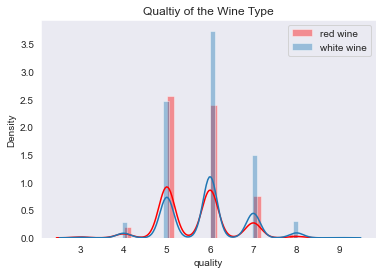

In [107]:
sns.set_style('dark')
sns.distplot(red_wind_quality, kde=True, color="red", label='red wine')
sns.distplot(white_wind_quality, kde=True, label='white wine')
plt.title("Qualtiy of the Wine Type")
plt.legend()
plt.show()


부분 회귀 플롯으로 시각화하기

In [108]:
import statsmodels.api as sm

In [110]:
others = list(set(wine.columns).difference(set(["quality","fixedacidity"])))

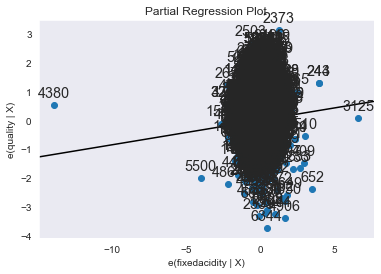

In [112]:
p, resids = sm.graphics.plot_partregress("quality","fixedacidity", others, data=wine, ret_coords=True)

In [114]:
plt.show()

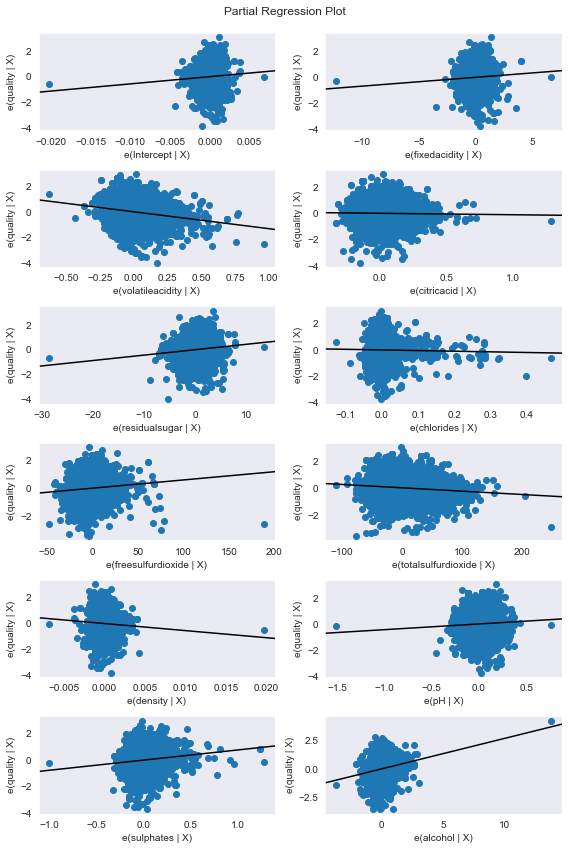

In [115]:
fig = plt.figure(figsize=(8,12))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()